<a href="https://colab.research.google.com/github/Charly1368/Modulo-2---Modelos-Estad-sticos/blob/main/Estimadores_Est%C3%A1disticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Descripción del ejercicio:

Se tiene una variable aleatoria X que sigue una distribución Gamma con parámetros: α (parámetro de forma) β (parámetro de escala en esta implementación, aunque a veces se usa como tasa λ=1/β)

Queremos estimar α y β a partir de una muestra aleatoria utilizando el método de momentos.

*   Se fija la semilla para obtener siempre la misma muestra (reproducibilidad)
*   Se generan 1000 valores aleatorios a partir de una distribución Gamma (5, 2)

## Método de Momentos

El método de momentos consiste en igualar los momentos teóricos con los momentos muestrales.

*Momentos teóricos de una distribución Gamma {α , β}:*

*   Esperanza:

$${E}[X] = \frac{\alpha}{\beta}
$$

*   Varianza:
$${Var}(X) = \frac{\alpha}{\beta^2}
$$

## Momentos muestrales

*   Media muestral:
$$
\bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i
$$

*   Varianza muestral:
$$
S^2 = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2
$$

## Estimación de los parámetros

Igualando la media teórica con la media muestral:
$$
\frac{\alpha}{\beta} = \bar{X}
$$

Igualando la varianza teórica con la varianza muestral:
$$
\frac{\alpha}{\beta^2} = S^2
$$

Despejamos β:
$$
\beta = \frac{\bar{X}}{S^2}
$$

Sustituyendo en la ecuación de la media:
$$
\alpha = \bar{X} \cdot \beta = \frac{\bar{X}^2}{S^2}
$$

Así, las estimaciones de los parámetros mediante el método de momentos son:
$$
\hat{\alpha} = \frac{\bar{X}^2}{S^2}, \quad \hat{\beta} = \frac{\bar{X}}{S^2}
$$

## Cálculo paso a paso con la muestra

* Media muestral estimada
$$
\bar{X} = \frac{1}{1000} \sum_{i=1}^{1000} X_i = 2.554
$$

* Varianza muestral estimada
$$
S^2 = \frac{1}{999} \sum_{i=1}^{1000} (X_i - \bar{X})^2 = 1.252
$$

Cálculo de los parámetros estimados

- Estimación de β:
$$
\hat{\beta} = \frac{\bar{X}}{S^2} = \frac{2.554}{1.252} = 2.039
$$

- Estimación de α:
$$
\hat{\alpha} = \bar{X} \cdot \hat{\beta} = 2.554 \times 2.039 = 5.209
$$

Por lo tanto, los parámetros estimados usando el método de momentos son:
$$
\hat{\alpha} = 5.209, \quad \hat{\beta} = 2.039
$$



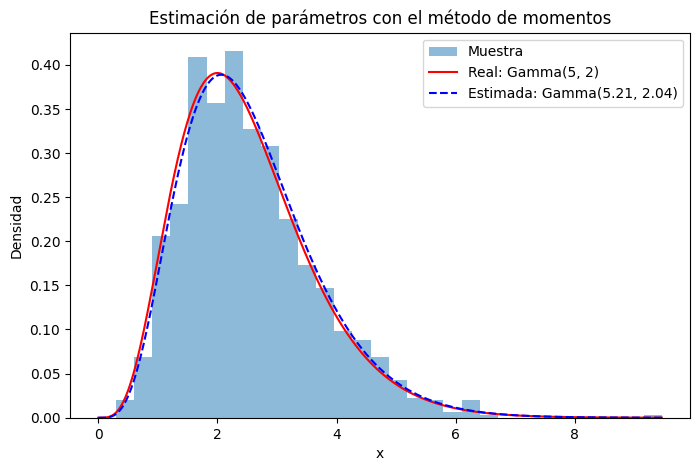

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def estimate_gamma_moments(sample):
    mean_sample = np.mean(sample)
    var_sample = np.var(sample, ddof=1)  # varianza muestral

    beta_hat = mean_sample / var_sample
    alpha_hat = mean_sample * beta_hat

    return alpha_hat, beta_hat

# Generar una muestra de una distribución Gamma con valores reales de alpha y beta
np.random.seed(42)  # Reproducibilidad
alpha_real = 5
beta_real = 2
n_samples = 1000

sample = np.random.gamma(alpha_real, 1/beta_real, n_samples)

# Estimar los parámetros con el método de momentos
alpha_hat, beta_hat = estimate_gamma_moments(sample)

# Graficar la distribución real y la estimada
x = np.linspace(0, max(sample), 1000)
real_pdf = stats.gamma.pdf(x, alpha_real, scale=1/beta_real)
estimated_pdf = stats.gamma.pdf(x, alpha_hat, scale=1/beta_hat)

plt.figure(figsize=(8, 5))
plt.hist(sample, bins=30, density=True, alpha=0.5, label='Muestra')
plt.plot(x, real_pdf, 'r-', label=f'Real: Gamma({alpha_real}, {beta_real})')
plt.plot(x, estimated_pdf, 'b--', label=f'Estimada: Gamma({alpha_hat:.2f}, {beta_hat:.2f})')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.title('Estimación de parámetros con el método de momentos')
plt.legend()
plt.show()

Parámetros reales: α=2, β=1.5
Parámetros estimados: α̂=2.1583, β̂=1.5716


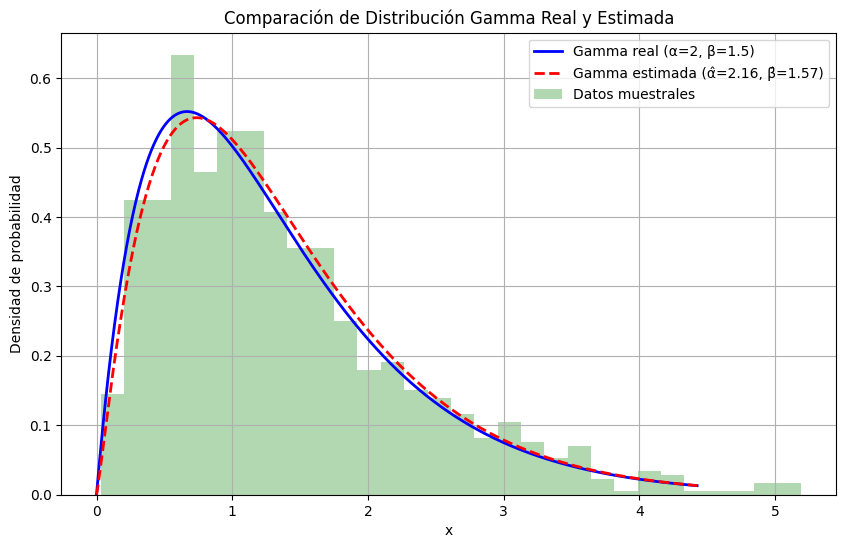


Ejemplo 2 - Parámetros reales: α=5, β=0.5
Ejemplo 2 - Parámetros estimados: α̂=5.0065, β̂=0.4979


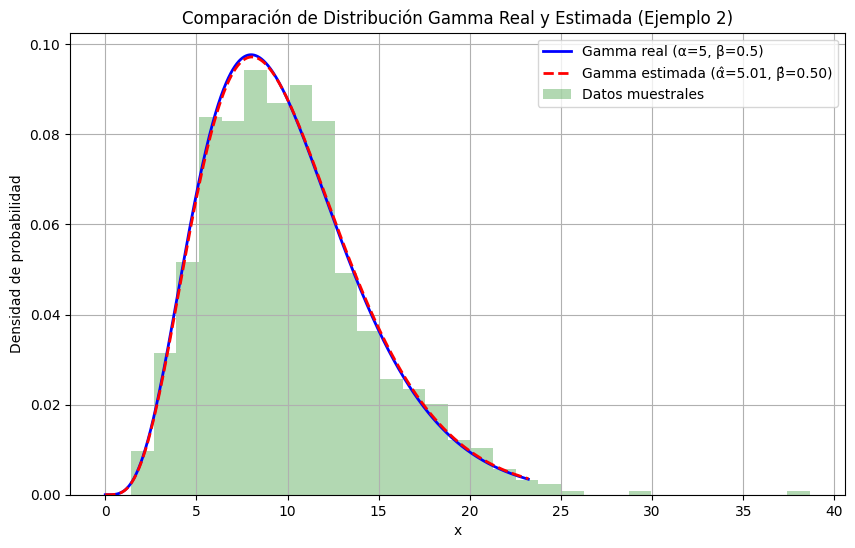

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

def estimar_gamma_momentos(muestra):
    """
    Estima los parámetros alpha (α) y beta (β) de una distribución Gamma
    usando el método de momentos.

    Parámetros:
    muestra: array-like, muestra de datos distribuidos Gamma(α, β)

    Retorna:
    alpha_est, beta_est: parámetros estimados
    """
    media_muestral = np.mean(muestra)
    varianza_muestral = np.var(muestra, ddof=0)  # Usar varianza poblacional

    # Estimación por método de momentos
    beta_est = media_muestral / varianza_muestral
    alpha_est = media_muestral * beta_est

    return alpha_est, beta_est

# Ejemplo Generar datos de una Gamma(α=2, β=1.5)
np.random.seed(42)
alpha_real = 2
beta_real = 1.5
n = 1000  # Tamaño de muestra
datos = gamma.rvs(a=alpha_real, scale=1/beta_real, size=n)

# Estimación de parámetros
alpha_est, beta_est = estimar_gamma_momentos(datos)

print(f"Parámetros reales: α={alpha_real}, β={beta_real}")
print(f"Parámetros estimados: α̂={alpha_est:.4f}, β̂={beta_est:.4f}")

# Graficar distribución real vs estimada
x = np.linspace(0, gamma.ppf(0.99, a=alpha_real, scale=1/beta_real), 1000)

# Distribución real
pdf_real = gamma.pdf(x, a=alpha_real, scale=1/beta_real)
# Distribución estimada
pdf_est = gamma.pdf(x, a=alpha_est, scale=1/beta_est)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf_real, 'b-', lw=2, label=f'Gamma real (α={alpha_real}, β={beta_real})')
plt.plot(x, pdf_est, 'r--', lw=2, label=f'Gamma estimada (α̂={alpha_est:.2f}, β̂={beta_est:.2f})')
plt.hist(datos, bins=30, density=True, alpha=0.3, color='g', label='Datos muestrales')
plt.title('Comparación de Distribución Gamma Real y Estimada')
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()

# Ejemplo Con diferentes parámetros
alpha_real2 = 5
beta_real2 = 0.5
datos2 = gamma.rvs(a=alpha_real2, scale=1/beta_real2, size=n)

alpha_est2, beta_est2 = estimar_gamma_momentos(datos2)

print(f"\nEjemplo 2 - Parámetros reales: α={alpha_real2}, β={beta_real2}")
print(f"Ejemplo 2 - Parámetros estimados: α̂={alpha_est2:.4f}, β̂={beta_est2:.4f}")

# Graficar segundo ejemplo
x2 = np.linspace(0, gamma.ppf(0.99, a=alpha_real2, scale=1/beta_real2), 1000)

pdf_real2 = gamma.pdf(x2, a=alpha_real2, scale=1/beta_real2)
pdf_est2 = gamma.pdf(x2, a=alpha_est2, scale=1/beta_est2)

plt.figure(figsize=(10, 6))
plt.plot(x2, pdf_real2, 'b-', lw=2, label=f'Gamma real (α={alpha_real2}, β={beta_real2})')
plt.plot(x2, pdf_est2, 'r--', lw=2, label=f'Gamma estimada (α̂={alpha_est2:.2f}, β̂={beta_est2:.2f})')
plt.hist(datos2, bins=30, density=True, alpha=0.3, color='g', label='Datos muestrales')
plt.title('Comparación de Distribución Gamma Real y Estimada (Ejemplo 2)')
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()

## Ejercicio 2.

Estimación por método de momentos:
θ̂ = 0.002786 (tasa)
Media estimada = 359.00 minutos


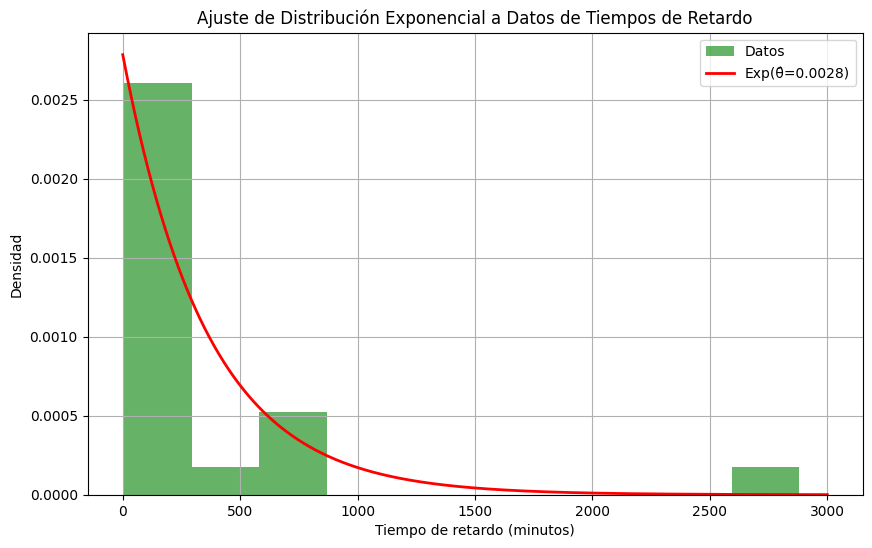

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Datos de tiempos de retardo (en minutos)
datos_expon = np.array([525, 719, 2880, 150, 30, 251, 45, 858, 15, 47,
                        90, 56, 68, 6, 189, 180, 60, 60, 204, 747])

# Método de momentos para distribución exponencial
# Para Exp(θ), E[X] = 1/θ ⇒ θ̂ = 1/mean(data)
theta_est = 1 / np.mean(datos_expon)
media_est = 1 / theta_est

print(f"Estimación por método de momentos:")
print(f"θ̂ = {theta_est:.6f} (tasa)")
print(f"Media estimada = {media_est:.2f} minutos")

# Visualización
plt.figure(figsize=(10, 6))
plt.hist(datos_expon, bins=10, density=True, alpha=0.6, color='g', label='Datos')

# PDF teórica con parámetro estimado
x = np.linspace(0, 3000, 1000)
pdf_est = expon.pdf(x, scale=media_est)
plt.plot(x, pdf_est, 'r-', lw=2, label=f'Exp(θ̂={theta_est:.4f})')

plt.title('Ajuste de Distribución Exponencial a Datos de Tiempos de Retardo')
plt.xlabel('Tiempo de retardo (minutos)')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()


Estimadores de Máxima Verosimilitud para N(μ, σ²):
μ_MV = 4.7923 (valor real: 5)
σ²_MV = 3.2661 (valor real: 4)

Fórmulas analíticas:
μ = (1/n)ΣX_i = 4.7923
σ² = (1/n)Σ(X_i-μ)² = 3.2661


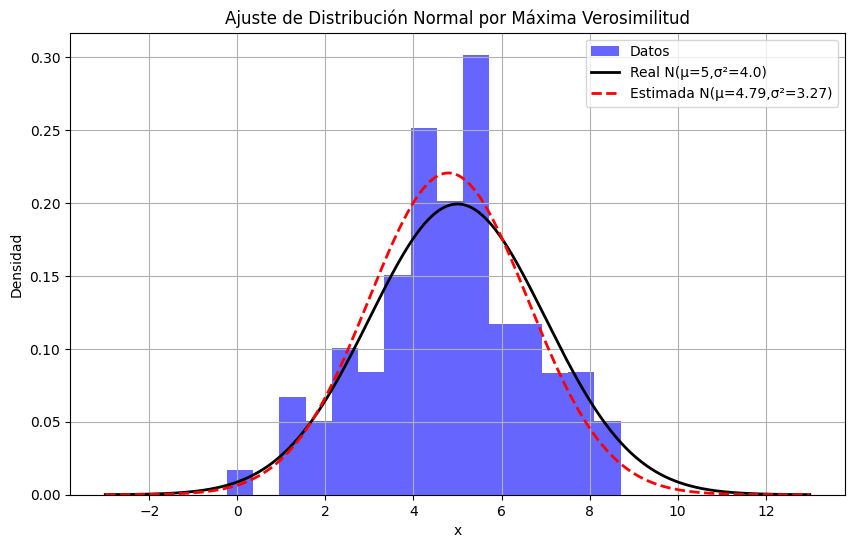

In [18]:
from scipy.stats import norm
from scipy.optimize import minimize
import math

# Generaremos datos normales para el ejemplo
np.random.seed(42)
mu_real, sigma_real = 5, 2
datos_norm = norm.rvs(loc=mu_real, scale=sigma_real, size=100)

# Función de verosimilitud negativa (para minimizar)
def neg_log_verosimilitud(params, data):
    mu, sigma = params
    n = len(data)
    if sigma <= 0:  # Restricción: sigma > 0
        return np.inf
    return (n/2)*np.log(2*np.pi) + (n/2)*np.log(sigma**2) + (1/(2*sigma**2))*np.sum((data - mu)**2)

# Estimación MV
initial_guess = [np.mean(datos_norm), np.std(datos_norm)]
result = minimize(neg_log_verosimilitud, initial_guess, args=(datos_norm,),
                  bounds=((None, None), (1e-6, None)))

mu_mv, sigma_mv = result.x
sigma2_mv = sigma_mv**2

print("\nEstimadores de Máxima Verosimilitud para N(μ, σ²):")
print(f"μ_MV = {mu_mv:.4f} (valor real: {mu_real})")
print(f"σ²_MV = {sigma2_mv:.4f} (valor real: {sigma_real**2})")

# Comparación con fórmula analítica
mu_analitico = np.mean(datos_norm)
sigma2_analitico = np.var(datos_norm, ddof=0)

print("\nFórmulas analíticas:")
print(f"μ = (1/n)ΣX_i = {mu_analitico:.4f}")
print(f"σ² = (1/n)Σ(X_i-μ)² = {sigma2_analitico:.4f}")

# Visualización
plt.figure(figsize=(10, 6))
plt.hist(datos_norm, bins=15, density=True, alpha=0.6, color='b', label='Datos')

x = np.linspace(mu_real-4*sigma_real, mu_real+4*sigma_real, 1000)
pdf_real = norm.pdf(x, loc=mu_real, scale=sigma_real)
pdf_est = norm.pdf(x, loc=mu_mv, scale=sigma_mv)

plt.plot(x, pdf_real, 'k-', lw=2, label=f'Real N(μ={mu_real},σ²={sigma_real**2:.1f})')
plt.plot(x, pdf_est, 'r--', lw=2, label=f'Estimada N(μ={mu_mv:.2f},σ²={sigma2_mv:.2f})')

plt.title('Ajuste de Distribución Normal por Máxima Verosimilitud')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

3. Ejercicio de los focos

Estimación MLE del parámetro θ: 0.3571


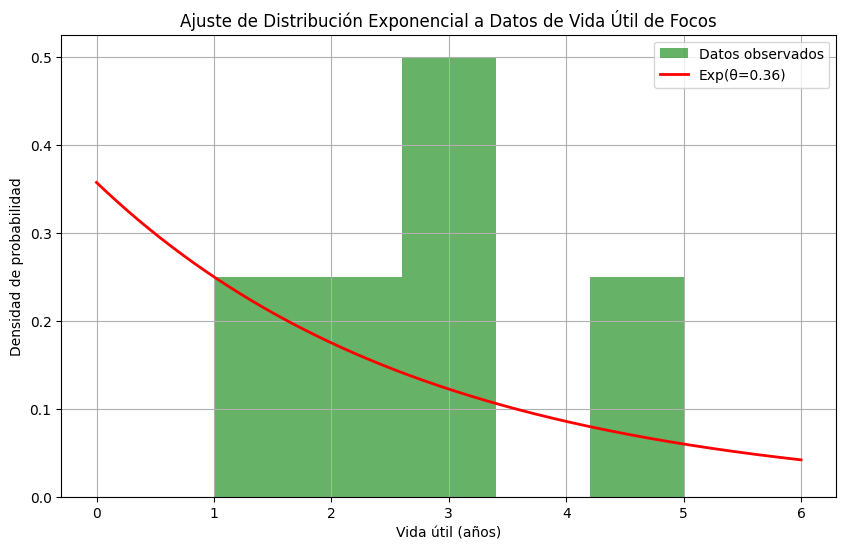


Media muestral: 2.80 años
Tasa de fallo estimada (θ): 0.3571 (fallos por año)
Tiempo medio estimado entre fallos: 2.80 años


In [19]:
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt

# Datos de vida útil de los focos (en años)
datos = np.array([2, 3, 1, 3, 5])

# Cálculo del estimador MLE para θ en una distribución exponencial
# Para Exp(θ), el MLE de θ es 1/media_muestral
theta_mle = 1 / np.mean(datos)

print(f"Estimación MLE del parámetro θ: {theta_mle:.4f}")

# Visualización de los datos y la distribución ajustada
plt.figure(figsize=(10, 6))

# Histograma de los datos
plt.hist(datos, bins=5, density=True, alpha=0.6, color='g', label='Datos observados')

# PDF de la distribución exponencial con θ estimado
x = np.linspace(0, 6, 1000)
pdf_est = expon.pdf(x, scale=1/theta_mle)  # scale = 1/θ
plt.plot(x, pdf_est, 'r-', lw=2, label=f'Exp(θ={theta_mle:.2f})')

plt.title('Ajuste de Distribución Exponencial a Datos de Vida Útil de Focos')
plt.xlabel('Vida útil (años)')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()

# Información adicional
print(f"\nMedia muestral: {np.mean(datos):.2f} años")
print(f"Tasa de fallo estimada (θ): {theta_mle:.4f} (fallos por año)")
print(f"Tiempo medio estimado entre fallos: {1/theta_mle:.2f} años")